<a href="https://colab.research.google.com/github/whitefreeze/Prediction-of-Product-Sales/blob/main/wk2_Project1_Part2_GitHub_repository.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 2 

## Connect to Data

In [53]:
# Mount Google Drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# Pandas
import pandas as pd

In [55]:
# Load Data
filename = '/content/drive/MyDrive/Data Science/Coding Dojo/02 Week 2: Pandas/sales_predictions.csv'
df = pd.read_csv(filename)

In [56]:
# Inspect Data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [57]:
# Inspect Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

* Explore the data - what do you need to do to clean this data? Clean it!

### Rows & Columns

1. How many rows and columns?

In [58]:
# display the number of rows and columns in the dataframe
df.shape

(8523, 12)

* There are 8,523 rows and 12 columns

### Datatypes

2. What are the datatypes of each variable?

In [59]:
# Display the column names and datatypes for each
# Columns with strings or mixed datatypes are identified as an object for the datatype
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

* The data type for each column includes integers, floats and objects

### Duplicates

3. Are there duplicates? If so, drop any duplicates.

In [60]:
## Show number of duplicate rows in the dataset
df.duplicated().sum()

0

* There are no duplicated rows in the dataset

### Identify Missing Values

4. Identify missing values.

In [61]:
# Method 1
# check data types and non-null values using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* The following have non-null values: 

1.   Item_weight
2.   Outlet_Size



In [62]:
# Method 2
# identify missing values directly using .isnull().sum()
df.isnull().sum()	

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* Same results, but displayed more clearly.

### Address Missing Values

5. Decide on how to address the missing values and then do it.

#### Item_Weight

Weight of product

In [63]:
# Create filter for null Item_Weight values
filter_itemweight = df['Item_Weight'].isnull()
filter_itemweight.value_counts(normalize=True)

False    0.828347
True     0.171653
Name: Item_Weight, dtype: float64

* Item_Weight contains 17.17% null values. 

* Seems a little high to delete those observations (over 5%), but a little low to delete the entire column (not over 50%)

* Other options could be imputing the missing values, which but is still a rather large portion of the data to do that, especially considering Item_Weight is a continuous numeric range.

* Finally, converting the NaN values into "missing" may be the best option to not skew the data by imputing any data or deleting rows or columns.

In [64]:
# Replace NaN values in Item_Weight with value "missing"
df["Item_Weight"].fillna("missing", inplace=True)

# Verify that there are no more null values in Item_Weight
df['Item_Weight'].isnull().sum()

0

* All null values in Item_Weight have been addressed.

#### Outlet_Size

In [65]:
# Create filter for null Outlet_Size values
filter_outletsize = df['Outlet_Size'].isnull()
filter_outletsize.value_counts(normalize=True)

False    0.717236
True     0.282764
Name: Outlet_Size, dtype: float64

* Outlet_Size contains 28.28% null values. This is in a similar range to what Item_Weight was. Let's take a look at what kind of data type Outlet_Size is.

In [66]:
# Find Outlet_Size data type
display(df['Outlet_Size'].value_counts())
print()
df['Outlet_Size'].value_counts(normalize=True)

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Medium    0.456895
Small     0.390643
High      0.152462
Name: Outlet_Size, dtype: float64

We can see that the data type in  Outlet_Size is categorical: ordinal. 

* Note that 45% is Medium, 39% is Small, and only 15% is High.

* As 28% null-values is fairly significant, yet not over 50%, I recommend we use the median value of Outlet_Size (which is Medium, which is the mean of Sizes, itself)

In [67]:
# Verify what the mean value of Outlet_Size is
df['Outlet_Size'].describe(include='object')

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

* Verified that Medium is the median value in Outlet_Size.

In [68]:
# Replace null values in Outlet_Size with Medium
df['Outlet_Size'].fillna('Medium', inplace = True)

# Verify that there are no more null values in Outlet_Size
df['Outlet_Size'].isnull().sum()

0

### Verify Missing Values Addressed

6. Confirm that there are no missing values after addressing them.

In [69]:
# Let's run our tests again!

# Verify that there are no more null values in Item_Weight
df['Item_Weight'].isnull().sum()

0

In [70]:
# Verify that there are no more null values in Outlet_Size
df['Outlet_Size'].isnull().sum()

0

* Confirmed: neither **Item_Weight** *nor* **Outlet_Size** have any missing values

### Find & Fix Inconsistent Categories

7. Find and fix any inconsistent categories of data.

* Let's try to go through the columns to see if we can find any inconsistent categories of data

In [71]:
# Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


#### Numerical Discrete Categories

##### Outlet_Establishment_Year

The year in which each store was established

In [72]:
# Look at number of values and evaluate data.
display(df['Outlet_Establishment_Year'].value_counts())
# Count number of unique values
df['Outlet_Establishment_Year'].nunique()
# Numerical Discrete data

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

9

* No errors noted. Data shows years of stores' establishment and all look reasonable years for a supermarket/grocery store. In one year, two different store locations opened. 

##### Item_Outlet_Sales

Sales of the product in the particular store. This is the target variable to be predicted.

In [73]:
# Evaluate data values
df['Item_Outlet_Sales'].value_counts()
# Appears to be Numerical Continuous, but should more likely be Numerical Discrete (and categorizing as such)

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [74]:
# Look at Item_Outlet_Sales to check min & max values
df.describe(include="number")

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


* No specific error noted outside of the non-discrete values included.
* Item_Outlet_Sales are just sales of an item at a particular location and values can vary widely "hot items" to "poor sellers". 
The values are positive, so that looks fine. 
* However, it is curious how the number of items sold are not discrete values. I am puzzled as to how fractions of a unit can be sold. I would recommend checking that these values are correct with a Subject Matter Expert.  
* I will categorize this group as Numerical Discrete for now (as that's what I would expect it to be) and follow-up with the SME.

#### Numerical Continuous Categories

##### Item_Weight

Weight of product

In [75]:
df['Item_Weight'].value_counts()
# Need to check if "missing" is the only non-float value in this category. Looks good if that is the case.

missing    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: Item_Weight, Length: 416, dtype: int64

In [85]:
# Verify if "missing" is the only non-numeric value

# count number of values for "missing"
display((df['Item_Weight'] == "missing").sum())
# count number of values that are not "missing"
display((df['Item_Weight'] != "missing").sum())
# show total number of observations in this column
display((df['Item_Weight']).info())
# add the "missing" and not "missing" values together to check if that matches the number of observations.
7060 + 1463
# it does. 
# No errors noted.

7060

1463

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Weight
Non-Null Count  Dtype 
--------------  ----- 
8523 non-null   object
dtypes: object(1)
memory usage: 66.7+ KB


None

8523

* No errors noted.

##### Item_Visibility

The percentage of total display area of all products in a store allocated to the particular product

In [30]:
# Display descriptive statistics for the numeric columns
# Notice Item_Visibility
df.describe(include='number')

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


In [33]:
# Let's see the values for Item_Visibility
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

* Values seem resonable outside of the 526 zero values. Otherwise, not noticing any outliers for Item_Visibility. A Subject Matter Expert should be asked to verify if zero is a reasonable value for this category.

##### Item_MRP

Item_MRP is the Maximum Retail Price of the product sold at grocery stores or supermarkets.



In [48]:
# Look at the data stats for Item_MRP
df.describe()
# Numerical Continuous

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


From the descriptive stats above, the min is 31.29 and max is 266.88. For products sold at a grocery stores, that seems high is the monetary unit is US Dollars.

The min value is eight times lower than the max value. If the cheapest grocery item is 2 USD, then the most expensive item would be $16 USD. 

Those values are possible, but do not seem to account for cheap items like gum at the checkout area or more expensive items like meat or cakes in specialty departments. Will need to consult a Subject Matter Expert to better understand whether or not those values are reasonable.

Without an SME, these values seem to lack any outliers and reasonable enough to move on for now.

#### Categorical Nominal Categories

##### Item_Identifier

Unique product ID

In [46]:
# Look at the data values
df['Item_Identifier'].value_counts()
# Categorical Nominal data

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

* No error noted. 
* The maximum value for a single Item_Identifier is 10, which matches the number of unique stores as seen in Outlet_Identifier. This is reasonable. 
* The number of unique values (1559) also seems reasonable as the distinct products sold across 10 separate grocery stores can be quite a few (and 1559 is not an exorbitant value, either) 

##### Item_Fat_Content

Whether the product is low fat or regular

In [24]:
# Let's see what we have for Item_Fat_Content
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Looks like we should only have two categories instad of five. Let's combine the correlating categories:

In [25]:
# Change 'LF' to 'Low Fat'
df['Item_Fat_Content'].replace('LF', 'Low Fat', inplace=True)

# Verify 'LF' replaced
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [26]:
# Change 'low fat' to 'Low Fat'
df['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace=True)

# Verify 'low fat' replaced
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [27]:
# Change 'reg' to 'Regular'
df['Item_Fat_Content'].replace('reg', 'Regular', inplace=True)

# Verify 'reg' replaced
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

* Item_Fat_Content  had duplicate data with different value names combined into the actual two categories that are represented

##### Outlet_Identifier

Unique store ID

In [34]:
# Determine Data Type for Outlet_Identifier
df['Outlet_Identifier'].value_counts()
# Categorical Nominal

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [35]:
df['Outlet_Identifier'].nunique()
# dataset includes data from 10 unique stores

10

* Values in Outlet_Identifier look reasonable and represent the number of items sold at each of the included grocery stores.

##### Item_Type

The category to which the product belongs

In [36]:
# Verify if the product categories look reasonable for Item_Type
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

* Product categories do indeed look reasonable. No errors noted.

#### Categorical Ordinal Categories

##### Outlet_Size

The size of the store in terms of ground area covered

In [40]:
# Evaluate data values
df['Outlet_Size'].value_counts()
# Categorical Ordinal

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

* No clear errors noted. Although "High" does not seem to match the same format as "Small" and "Medium". Could check with a Subject Matter Expert to see if "High" should be changed to "Large" or if "High" is the correct term for where the data was collected.

##### Outlet_Location_Type

The type of area in which the store is located

In [41]:
# Evaluate Data values
df['Outlet_Location_Type'].value_counts()
# Categorical Ordinal

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

* No error noted. Values seem reasonable.

##### Outlet_Type

Whether the outlet is a grocery store or some sort of supermarket

In [42]:
# Evaluate data values
df['Outlet_Type'].value_counts()
# Categorical Ordinal

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

* No errors noted. This category seems to correlate with Outlet_Size.

### Summary Statistics for Numerical Data

8. For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [47]:
# Find summary statistics for Numerical categoeries.
df.describe(include="number")

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


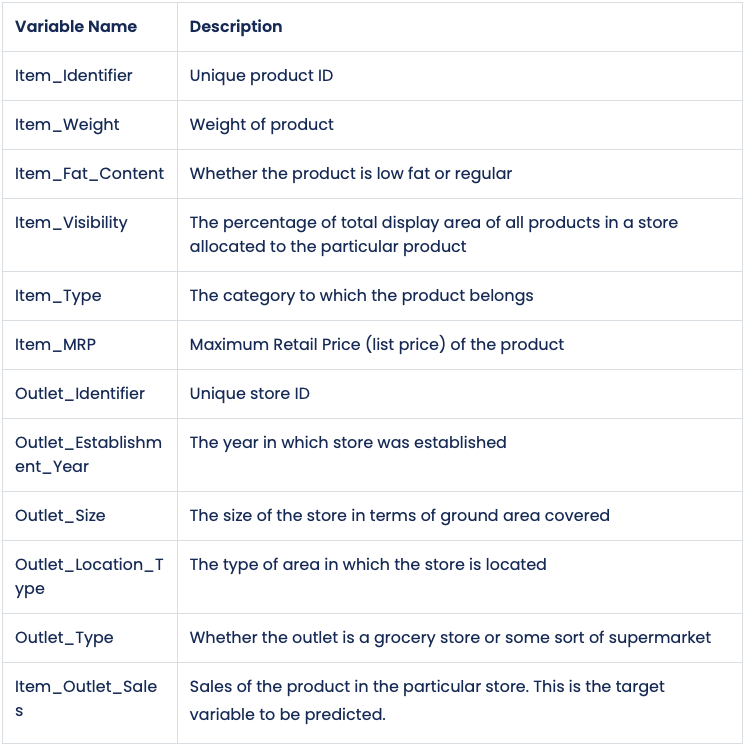